In [48]:
# Skolar Major Project 2
# Dataset used : mushrooms.csv
# Project author : Austin Jeeson

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
# For creating and removing a directory (folder), fetching its contents, changing and identifying the current directory

# **Consumable v/s Toxic : Choose wisely**
#### A mushroom or toadstool is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source. There are many species of mushrooms and some of the can be deadly. Knowing if a mushroom is poisonous or not is a very important thing as it is a matter of life or death. In this notebook I will use data science and machine learning to generate a model which is capable of telling if the mushroom is edible or not.

## **Goal**
### Generating a model using machine learning to evaluate the safety of a species of Mushroom

# **Steps to reach the goal**
#### 1. Finding appropriate data for training.
#### 2. Data Analysis.
#### 3. Feature Engineering.
#### 4. Data Preprocessing.
#### 5. Select the best, most useful features.
#### 6. Training an Machine Learning model.
#### 7. Looking at feature importance then remove the least useful features.
#### 8. Hyperparameter Tuning.
#### 9. Re-training the model using best features, best hyperparameters
#### 10.Model Validation.
#### 11.Evaluating the trained model.
#### 12.Saving the trained model for later use or deployment.

# **Setup and Imports**

In [49]:
import matplotlib.pyplot as plt # For plotting graphs and visualization
import seaborn as sns # Used in Data Science and Machine Learning tasks
sns.set_style("dark")
# To set the overall style of the plots created using the Seaborn library
from sklearn.preprocessing import LabelEncoder 
# To encode target labels with value between 0 and n_classes-1
from sklearn.model_selection import train_test_split
# To split arrays or matrices into random train and test subsets
from sklearn.model_selection import cross_val_score
# To evaluate a score by cross-validation
from sklearn.model_selection import GridSearchCV
# To automating the process of hyperparameter tuning and enhancing model performance
from sklearn.metrics import classification_report
# To build a text report showing the main classification metrics
from sklearn.metrics import plot_confusion_matrix
# For visualizing confusion matrices via matplotlib
from sklearn.linear_model import LogisticRegression
# To specify if a bias or intercept should be added to the decision function
from sklearn.ensemble import RandomForestClassifier
# To fit a number of decision tree classifiers on various sub-samples of the dataset 
from sklearn.svm import SVC
# Independent term in kernel function
import pickle
# To convert Python object hierarchy into a byte stream
import warnings
warnings.filterwarnings("ignore") # Ignoring warnings

# **Reading data and data description**

In [50]:
data = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
# Reads the csv file into DataFrame
data.info()
# Used for providing information of the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [51]:
data.head() # Display the lines of the file

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Mapping feature values to their real values

In [52]:
# Putting unique values in columns
for column in data.columns:
    print(f"{column} : {data[column].unique()}")

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [53]:
mapped_data = data.copy()
feature_name_mappings = {
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape": {'b':"bell","c":"conical","x":"convex","f":"flat", "k":"knobbed","s":"sunken"},
    'cap-surface': {'f':"fibrous","g":"grooves","y":"scaly","s":"smooth"},
    "cap-color": {'n':"brown",'b':'buff','c':'cinnamon','g':'gray','r':"green",'p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t': 'bruises', 'f': 'no'},
    "odor":{'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    "gill-attachment":{'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing":{'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size":{'b': 'broad', 'n': 'narrow'},
    "gill-color":{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': ' green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape":{'e': 'enlarging', 't': 'tapering'},
    "stalk-root":{'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    "stalk-surface-above-ring":{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring":{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring":{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring":{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type":{'p': 'partial', 'u': 'universal'},
    "veil-color":{'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number":{'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type":{'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    "spore-print-color":{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population":{'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat":{'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}
for column in mapped_data.columns:
    mapping_dict = feature_name_mappings[column]
    for index in range(len(mapped_data[column])):
        mapped_data[column][index] = mapping_dict[mapped_data[column][index]]
# Copying data from dataset to another dataset 

In [54]:
mapped_data.head()
# Display lines of the file

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


### No null values in the data and all 23 columns have values represented by english alphabets. As far as the data description goes this is enough to start exploring the data.

# **Exploratory Data Analysis**

### Value Counts

<AxesSubplot:xlabel='class', ylabel='count'>

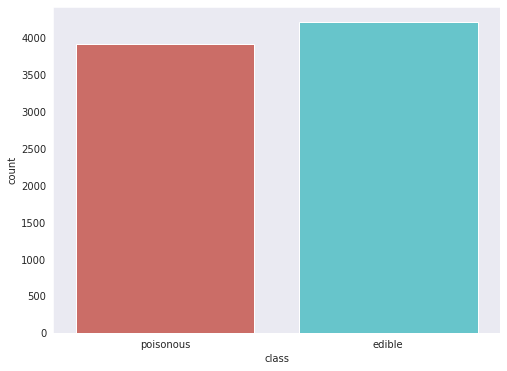

In [55]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'class',data = mapped_data,palette = 'hls')
# Plots a count chart including with values

In [56]:
mapped_data.columns
# Displays the contents of a file in columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

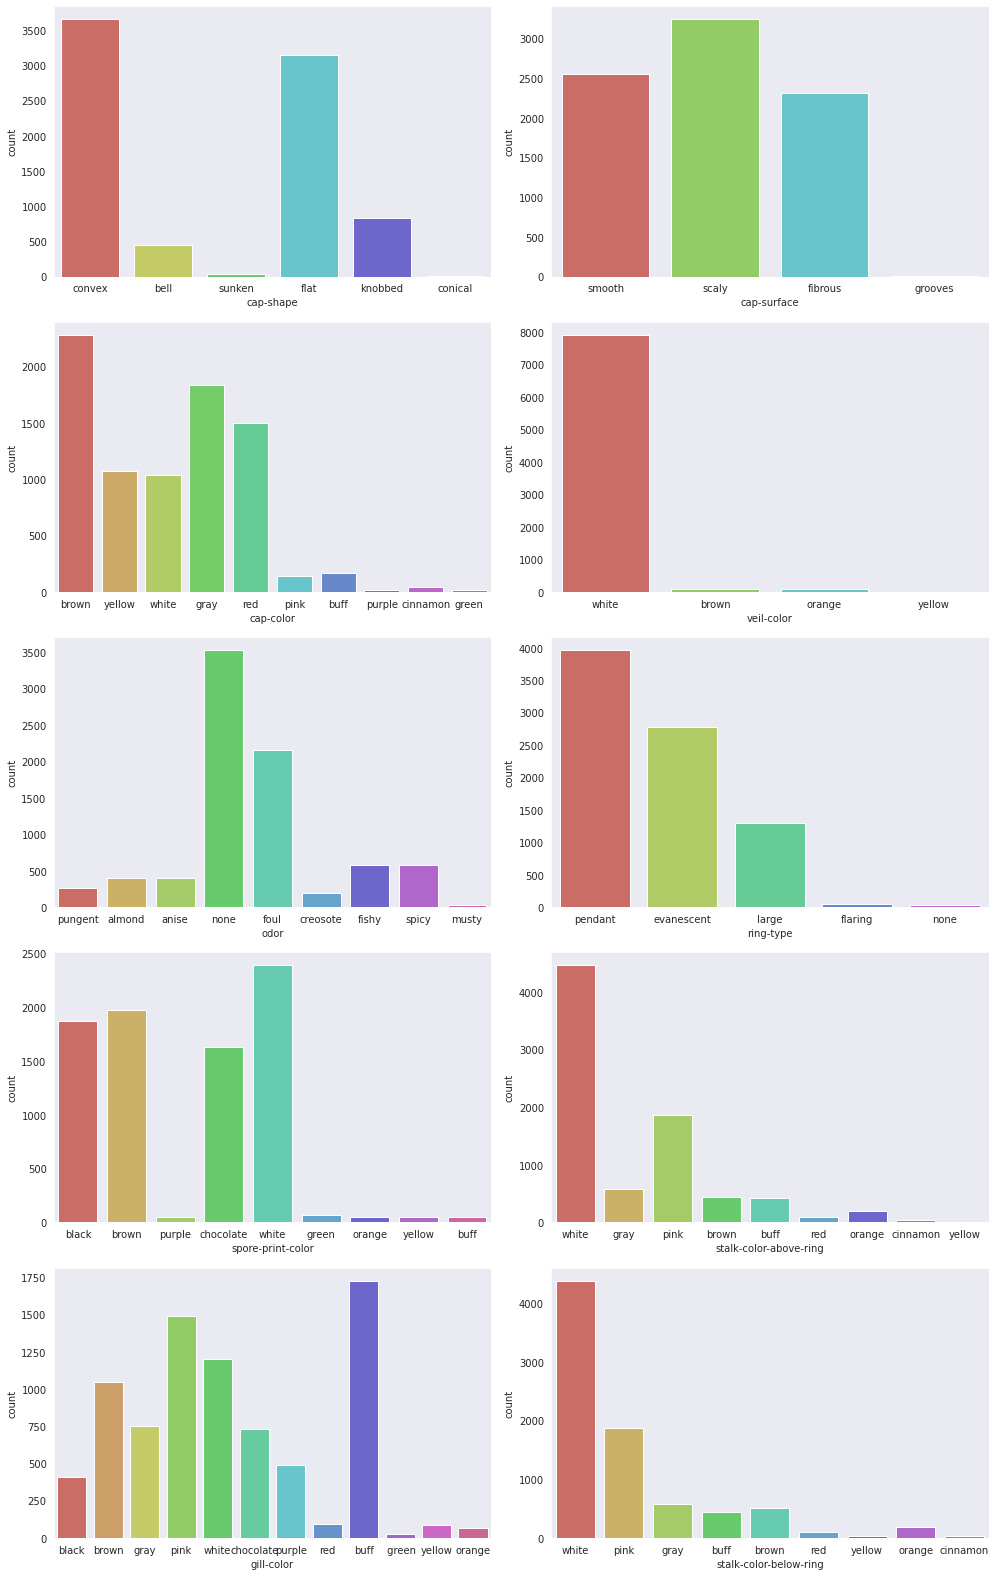

In [57]:
fig=plt.figure(figsize = (14,22)) 
columns = 2
rows = 5 
column_names = ['cap-shape', 'cap-surface', 'cap-color', 'veil-color', 'odor',
       'ring-type', 'spore-print-color', 'stalk-color-above-ring', 'gill-color',
       'stalk-color-below-ring']
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.countplot(x = column_names[i-1],data = mapped_data,palette = 'hls')
fig.tight_layout()
plt.show() 
# Plots multiple count charts including with values

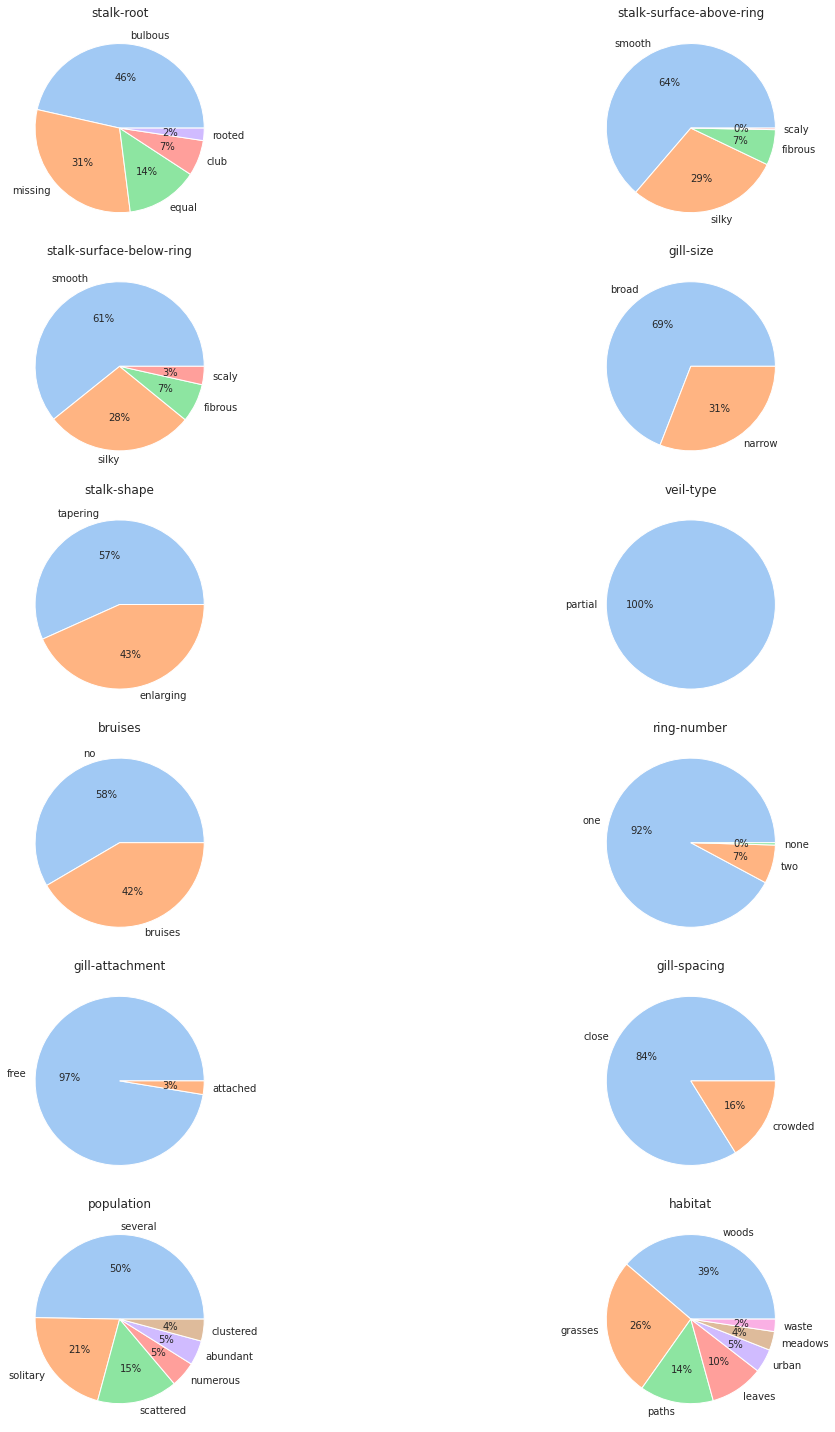

In [58]:
fig=plt.figure(figsize = (20,20)) 
columns = 2
rows = 6 
column_names = ['stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'gill-size',
       'stalk-shape', 'veil-type', 'bruises', 'ring-number',
       'gill-attachment', 'gill-spacing', 'population', 'habitat']
for i in range(1, columns*rows +1): 
    names = []
    counts = []
    for idx, name in enumerate(mapped_data[column_names[i-1]].value_counts().index.tolist()):
        names.append(name)
        counts.append(mapped_data[column_names[i-1]].value_counts()[idx])
    fig.add_subplot(rows, columns, i) 
    colors = sns.color_palette('pastel')[0:len(names)]
    plt.title(column_names[i-1])
    plt.pie(x = counts,labels = names,colors = colors,autopct='%.0f%%')
fig.tight_layout()
plt.show() 
# Plots multiple pie charts including with values

# **Feature Engineering and Data Preprocessing**

In [59]:
# Saving Encoders to get predictions on new data
encoders = {}
encoded_data = mapped_data.copy()
for feature_name in list(encoded_data.columns):
    encoder = LabelEncoder()
    encoder.fit(encoded_data[feature_name])
    encoders[feature_name] = encoder
    encoded_data[feature_name] = encoder.transform(encoded_data[feature_name])

In [60]:
for column in encoded_data.columns:
    print(f"{column} : {encoded_data[column].unique()}")
# Displays columns with unique data

class : [1 0]
cap-shape : [2 0 5 3 4 1]
cap-surface : [3 2 0 1]
cap-color : [0 9 8 3 7 5 1 6 2 4]
bruises : [0 1]
odor : [7 0 1 6 4 2 3 8 5]
gill-attachment : [1 0]
gill-spacing : [0 1]
gill-size : [1 0]
gill-color : [ 1  2  5  7 10  4  8  9  3  0 11  6]
stalk-shape : [0 1]
stalk-root : [2 1 0 4 3]
stalk-surface-above-ring : [3 0 2 1]
stalk-surface-below-ring : [3 0 1 2]
stalk-color-above-ring : [7 3 5 0 1 6 4 2 8]
stalk-color-below-ring : [7 5 3 1 0 6 8 4 2]
veil-type : [0]
veil-color : [2 0 1 3]
ring-number : [1 2 0]
ring-type : [4 0 2 1 3]
spore-print-color : [0 1 6 3 7 4 5 8 2]
population : [3 2 0 4 5 1]
habitat : [4 0 2 6 3 5 1]


In [61]:
X = encoded_data.drop('class',axis = 1)
Y = encoded_data['class']
# Deploying data into variables

In [62]:
X # Displays values within X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,2,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,2,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,1,1,...,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0,11,0,...,3,4,4,0,1,1,4,2,1,1
8120,2,3,0,1,6,0,0,0,11,0,...,3,4,4,0,0,1,4,2,4,1
8121,3,3,0,1,6,0,0,0,2,0,...,3,4,4,0,1,1,4,2,1,1
8122,4,2,0,1,3,1,0,1,3,1,...,2,7,7,0,2,1,0,7,4,1


#### Splitting the data is very important to not test the model on the data which it has already seen.

In [63]:
xtrain, xtest,ytrain,ytest = train_test_split(X,Y,test_size = (0.3))
# Spliting dataset into training, testing sets

# **Training different ML Models**

In [64]:
svm = SVC()
random_forest = RandomForestClassifier()
# Initialising ML models

In [65]:
def trainModel(model):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)
models = {
    "SVM":svm,
    "Random Forest" :random_forest
}
print('Accuracy')
for model in list(models.keys()):
    print(f"{model} : {round(trainModel(models[model])*100,2)}%")
# Checking the accuracy of the models used

Accuracy
SVM : 99.71%
Random Forest : 100.0%


### Achieved an accuracy of nearly 100% with these models and it shows how good the data is. Hence hyperparameter tuning is not needed. Further validation of model done below :

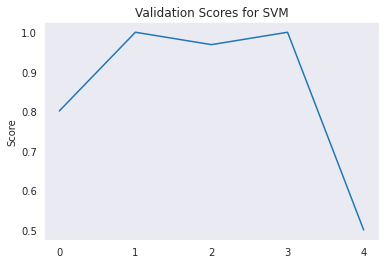

In [66]:
scores = cross_val_score(svm, X, Y, cv=5)
plt.plot(scores)
plt.title('Validation Scores for SVM')
plt.xticks([0,1,2,3,4])
plt.ylabel('Score')
plt.show()
# Plotting a graph for validation scores for SVM

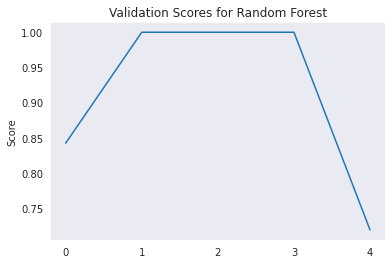

In [67]:
scores = cross_val_score(random_forest, X, Y, cv=5)
plt.plot(scores)
plt.title('Validation Scores for Random Forest')
plt.xticks([0,1,2,3,4])
plt.ylabel('Score')
plt.show()
# Plotting a graph for validation scores for Random Forest

### Poor accuracy found for first and last fold. 
### Attempting to solve using hyperparameter tuning :

In [68]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(xtrain, ytrain) 
print(grid.best_params_)
grid_predictions = grid.predict(xtest) 

print(classification_report(ytest, grid_predictions))
# Hyperparameter Tuning done on the dataset

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1252
           1       0.96      0.99      0.97      1186

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### All the best parameters are default parameters. Hence no tuning can be done.

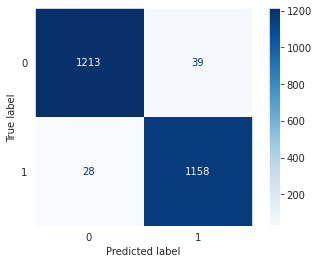

In [69]:
svm = SVC(C= 10, gamma= 'scale', kernel= 'linear')
svm.fit(xtrain,ytrain)
plot_confusion_matrix(svm, xtest, ytest, cmap=plt.get_cmap('Blues'))
# Plotting a confusion matrix for data

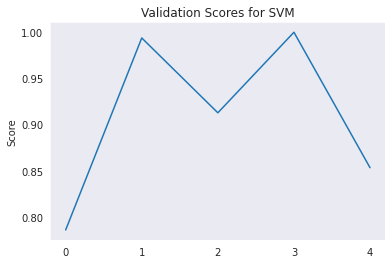

In [70]:
scores = cross_val_score(svm, X, Y, cv=5)
plt.plot(scores)
plt.title('Validation Scores for SVM')
plt.xticks([0,1,2,3,4])
plt.ylabel('Score')
plt.show()
# Plotting a graph for validation scores for SVM after tuning

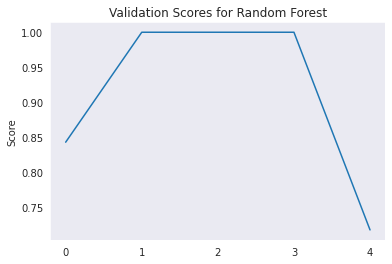

In [72]:
scores = cross_val_score(random_forest, X, Y, cv=5)
plt.plot(scores)
plt.title('Validation Scores for Random Forest')
plt.xticks([0,1,2,3,4])
plt.ylabel('Score')
plt.show()
# Plotting a graph for validation scores for Random Forest after tuning

# Summary :
### The model from this notebook only works with a dataset related to mushrooms. It handles data nicely with good Accuracy. It showed desired F1-Score, Precision and Recall.

In [47]:
pickle.dump(svm, open('Mushroo.sav', 'wb'))
# Saving the model